<h1 align = "center"> Ggplot2 </h1>

In [1]:
if (!require(ggplot2)){
  install.packages(ggplot2)
}
if (!require (ggthemes)){
  install.packages(ggthemes)
}
if (!require (dplyr)){
  install.packages(dplyr)
}
if(!require(ggExtra)){
  install.packages(ggExtra)
}

Loading required package: ggplot2
Loading required package: ggthemes
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggExtra


In [ ]:
# How to draw the error bar on ggplot + ggplot template
ggplot(final_result, aes(x=Item, y=oddsRatio,, fill = Item)) + 
  geom_bar(position=position_dodge(), stat="identity") +
  geom_errorbar(aes(ymin=lowbound, ymax=highbound),
                width=.2,                    # Width of the error bars
                position=position_dodge(.9))+geom_hline(y=1,linetype="dashed",  # Dashed line
                                                        size = 1.5, colour = "blue") + geom_text(aes(label=oddsRatio),position=position_dodge(width=0.9), hjust = 2.5,  vjust = -0.75, size=7) +
  geom_text(aes(label=final_result2$P, y = 0.5),size = 7)+
  theme_economist()+theme(text  =  element_text(size  =  12, family = "Georgia", face = "bold")) + ggtitle("Odds Ratio to Determine the Association between Featured Feedback and Rating Behavior")+
  scale_y_continuous(breaks = seq(0,10,by=1)) +guides(fill=FALSE)+
  theme(plot.title = element_text(lineheight=.8, face="bold", hjust = 0.5, size = 20)) + xlab("Indicators") + ylab("Odds Ratio")

# How to specify date object in ggplot2
p1 = ggplot(arpSpanCount,aes(x = Date,y = Frequency) ) + geom_bar(stat = "identity") + xlab("Chrome Install Date") + ylab ("Number of PCs") +
  scale_x_date(breaks = date_breaks("week"),
               labels = date_format("%d-%b"),
               minor_breaks = "1 day")


# Set up manual aesthetics
ggplot(filter(fullData,value<=50000 & value >=30000), aes(x=variable,y=value, color = color,alpha = color, size = color,group = CensusID))+
  
  scale_color_manual(values = c("1" ="#FFFF00", "2" = "#31a354")) + scale_alpha_manual(values = c("1" = 1,"2" = 0.2)) +
  scale_size_manual(values = c("1" = 1.5, "2" = 0.2)) + geom_line()  + facet_grid(Model~group) 

scale_y_continuous(breaks = c(20000,40000,60000)) +scale_color_manual(values=c(rep("#31a354",82),"#9999CC"))

# ggpairs
ggpairs(selectedUSData_Concise, diag=list(continuous="density", discrete="bar"), axisLabels="show")


In [2]:
setwd("./TakeHomeChallenge/AirbnbDataChallenge")

In [3]:
data = read.csv("train_users_2.csv", header = TRUE, as.is = TRUE)

In [4]:
str(data)

'data.frame':	213451 obs. of  16 variables:
 $ id                     : chr  "gxn3p5htnn" "820tgsjxq7" "4ft3gnwmtx" "bjjt8pjhuk" ...
 $ date_account_created   : chr  "2010-06-28" "2011-05-25" "2010-09-28" "2011-12-05" ...
 $ timestamp_first_active : num  2.01e+13 2.01e+13 2.01e+13 2.01e+13 2.01e+13 ...
 $ date_first_booking     : chr  "" "" "2010-08-02" "2012-09-08" ...
 $ gender                 : chr  "-unknown-" "MALE" "FEMALE" "FEMALE" ...
 $ age                    : num  NA 38 56 42 41 NA 46 47 50 46 ...
 $ signup_method          : chr  "facebook" "facebook" "basic" "facebook" ...
 $ signup_flow            : int  0 0 3 0 0 0 0 0 0 0 ...
 $ language               : chr  "en" "en" "en" "en" ...
 $ affiliate_channel      : chr  "direct" "seo" "direct" "direct" ...
 $ affiliate_provider     : chr  "direct" "google" "direct" "direct" ...
 $ first_affiliate_tracked: chr  "untracked" "untracked" "untracked" "untracked" ...
 $ signup_app             : chr  "Web" "Web" "Web" "Web" ...
 $ fi

In [6]:
unique(data$signup_method)

[1] "facebook" "basic"    "google"

In [52]:
unique(data$affiliate_channel)

[1] "direct"        "seo"           "other"         "sem-non-brand"
[5] "content"       "sem-brand"     "remarketing"   "api"

### Basic format change

* xlab, ylab, ggtitle
* theme_igray()+theme(text  =  element_text(size  =  20, family = "Georgia", face = "bold")) 
* use ?`theme` to adjust all the legend parameter (without legend, set legend.position == "none")

### Change the title of legend 
* use scale_color/fill_hue(etc.)(name = "")

### Change the date: 
*  library(scales)
* scale_x_date(breaks = date_breaks("week"),
               labels = date_format("%d-%b"),
                minor_breaks = date_breaks("1 day"))
                
### Change the formating of large number
* On the label:  prettyNum(count,big.mark=",",scientific=FALSE)
* On the axis: scale_y_continuous(label = comma)

### Position
position = "x" : dodge/stack/fill/identity/jitter

### Stat_summary(function = x, geom = y)
* Functions can be specified either for individual points (fun.y) or for the data as a whole (fun.data) 
* the geom option is a way of telling the stat which geom to use to represent the function, and this can take on values such as ‘errorbar’, ‘bar’ and ‘pointrange’

Option | Plot | Common Geom
--- | --- | ---
Fun.y = mean | `mean` | **geom = "bar"**
fun.data = mean_cl_normal()| 95% confidence intervals assuming normality| geom = "errorbar"/"pointrange"
fun.data = mean_cl_boot()|95% confidence intervals based on a bootstrap (not assuming normality)|geom = "errorbar"/"pointrange"
mean_sd()|Sample mean and standard deviation|geom = "errorbar"/"pointrange"
fun.data = median_hilow() |median and upper and lower quantiles|geom = "pointrange"

## Bar Plot

### Change the order of Categorical Variable

In [8]:
name_order  = c("basic", "facebook", "google")
data = transform(data,signup_method = factor(signup_method,name_order) )

### Raw data column

In [17]:
plot1.0 = ggplot(data = data,aes(x = factor(signup_method)))+
                 geom_bar() +
                 theme_igray()+
                 theme(text  =  element_text(size  =  20, face = "bold"))  + 
                 xlab("Sign Up Method") + ylab("Count") + 
                 ggtitle("Distribution of Signup Methods")

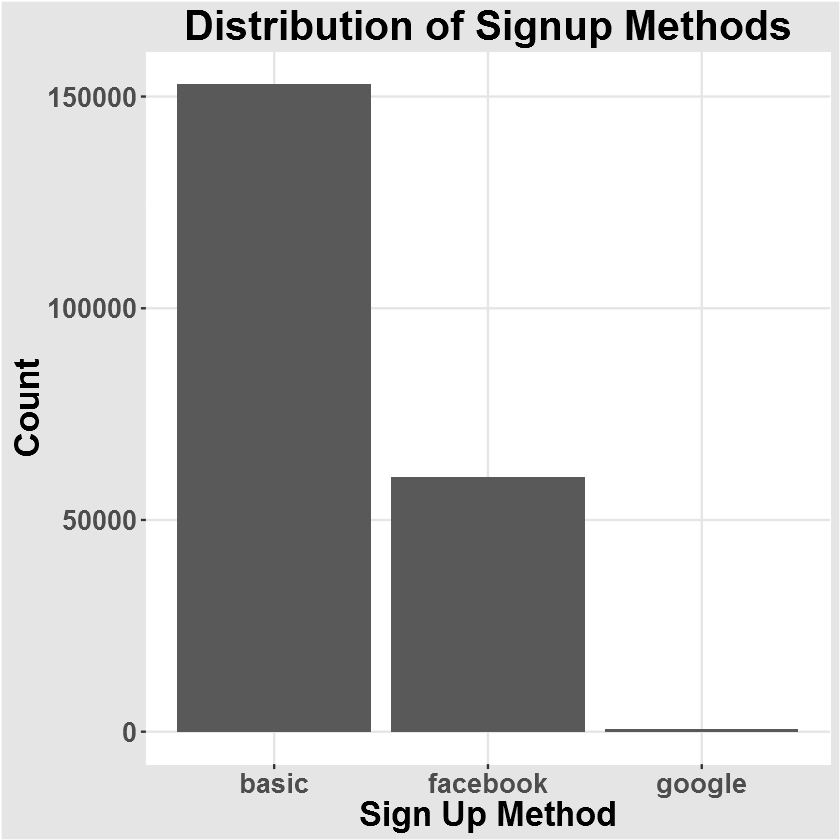

In [18]:
plot1.0

### Add label to the bar plot

In [21]:
data_agg_signupMethod = data %>% group_by(signup_method) %>% summarise(count = n())

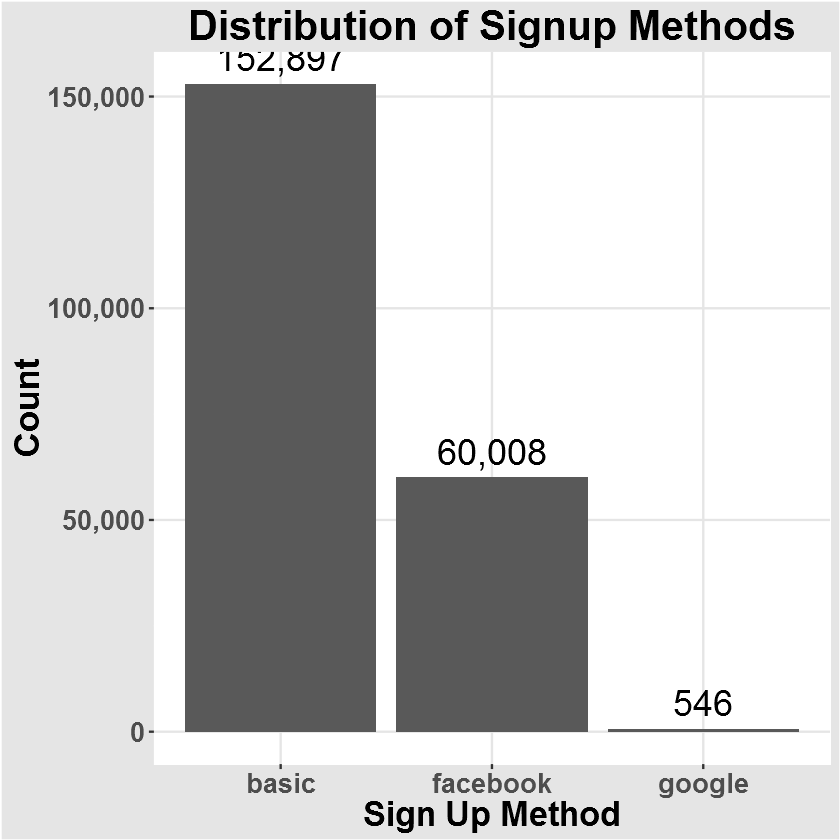

In [81]:
plot1.0 = ggplot(data = data_agg_signupMethod,aes(x = factor(signup_method), y = count, label = prettyNum(count,big.mark=",",scientific=FALSE)))+
                 geom_bar(stat = "identity") +
                 theme_igray()+
                 theme(text  =  element_text(size  =  20, face = "bold"))  + 
                 xlab("Sign Up Method") + ylab("Count") + scale_y_continuous(labels = comma) +
                 ggtitle("Distribution of Signup Methods")

plot1.1 = plot1.0 + geom_text(vjust = -0.5,size = 7.5)
plot1.1

### Add filling color to the bar plot 

In [91]:
plot1.0 = ggplot(data = data,aes(x = factor(signup_method), fill = signup_app))+
                 geom_bar() +
                 theme_igray()+
                 theme(text  =  element_text(size  =  20, face = "bold") ) + scale_fill_hue(name = "Sign up App") +
                 xlab("Sign Up Method") + ylab("Count") + 
                 ggtitle("Distribution of Signup Methods") 

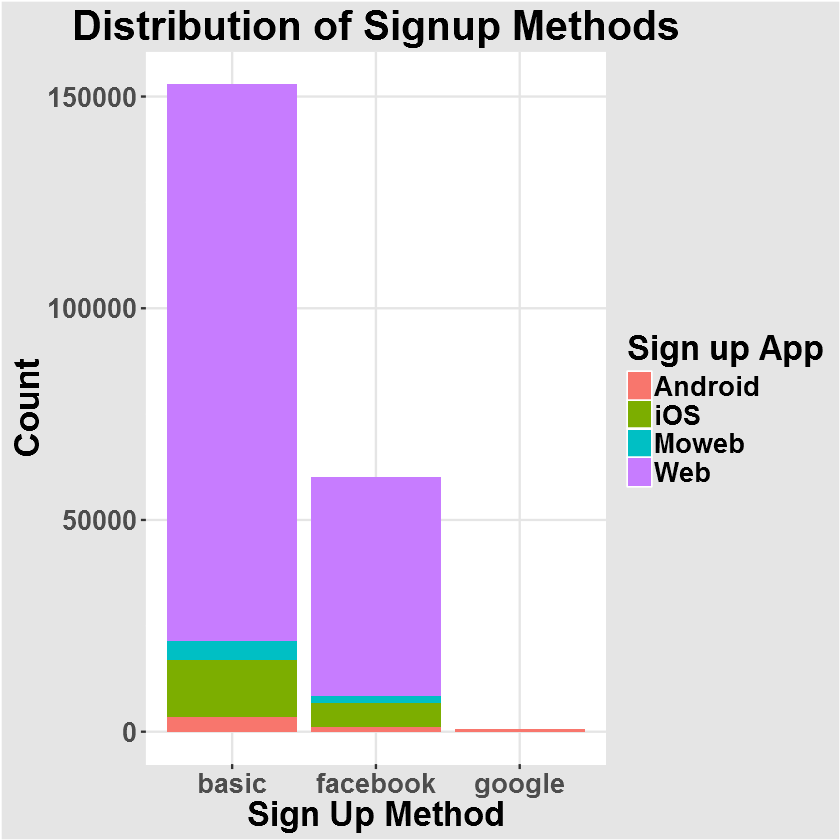

In [92]:
plot1.0

### Add text  to the bar plot 

In [106]:
data_agg_method_app = data %>% group_by(signup_method,signup_app) %>% summarise(count = n()) %>% mutate(y_position = cumsum(count)-count*0.5)

In [107]:
plot1.0 = ggplot(data = data_agg_method_app,aes(x = factor(signup_method), fill = signup_app, y = count))+
                 geom_bar(stat = "identity") +
                 theme_igray()+
                 theme(text  =  element_text(size  =  20, face = "bold") ) + scale_fill_hue(name = "Sign up App") +
                 geom_text(aes(y = y_position, label = count)) +
                 xlab("Sign Up Method") + ylab("Count") + 
                 ggtitle("Distribution of Signup Methods")

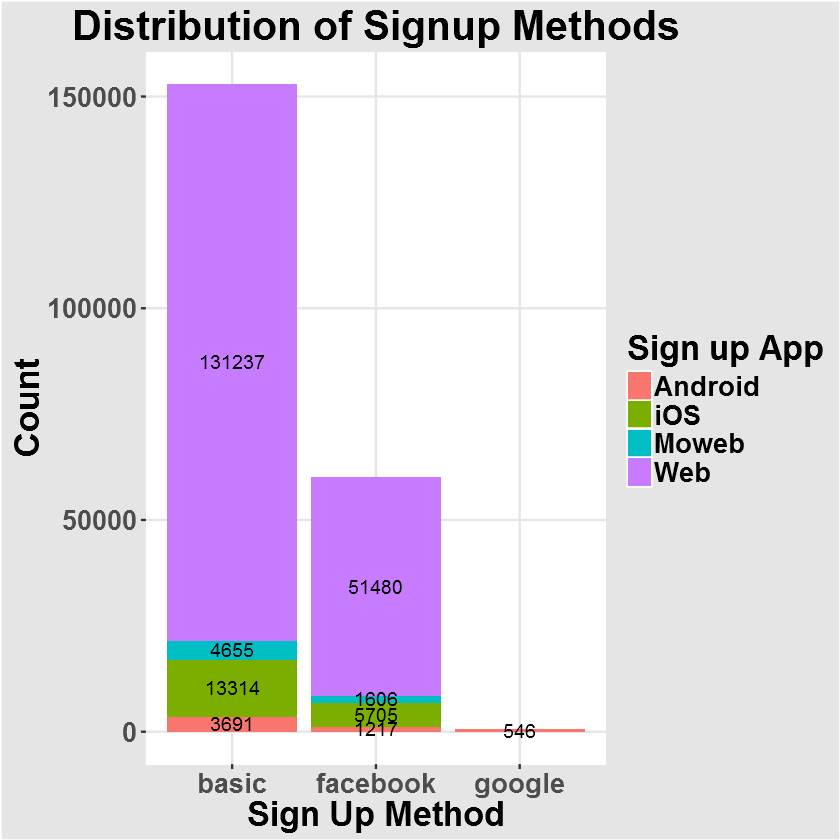

In [108]:
plot1.0

### Unstack the bar plot

In [110]:
plot1.0 = ggplot(data = data,aes(x = factor(signup_method), fill = signup_app))+
                 geom_bar(position="dodge") +
                 theme_igray()+
                 theme(text  =  element_text(size  =  20, face = "bold") ) + scale_fill_hue(name = "Sign up App") +
                 xlab("Sign Up Method") + ylab("Count") + 
                 ggtitle("Distribution of Signup Methods")

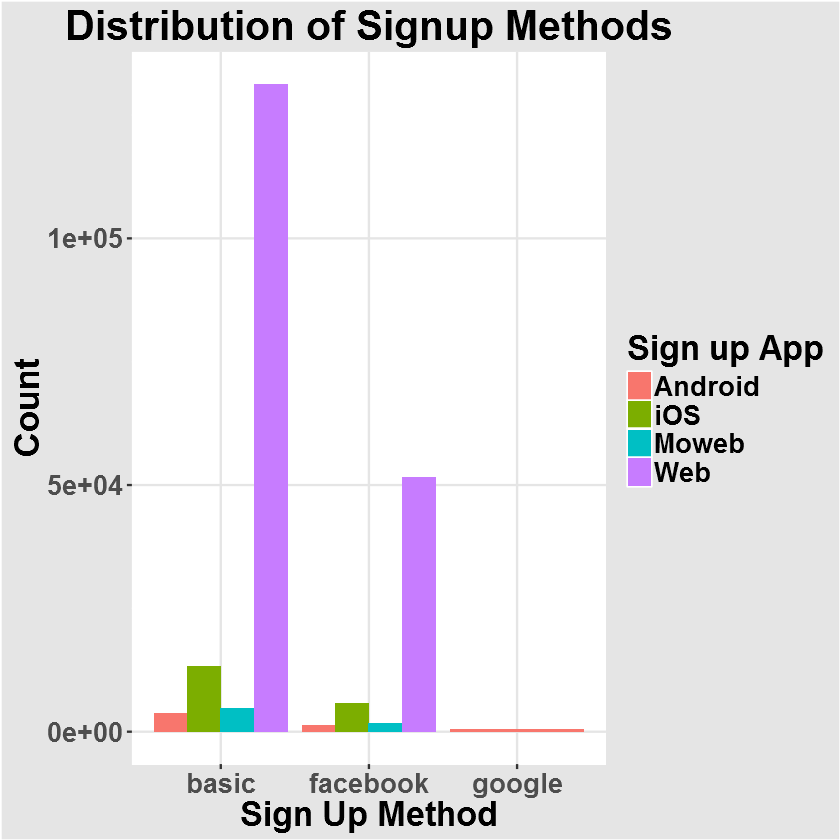

In [111]:
plot1.0

In [112]:
data_agg_method_app = data %>% group_by(signup_method,signup_app) %>% summarise(count = n()) %>% mutate(y_position = 0.5*count)

In [120]:
plot1.0 = ggplot(data = data_agg_method_app,aes(x = factor(signup_method), y = count, fill = signup_app))+
                 geom_bar(position="dodge", stat = "identity") +
                 theme_igray()+
                 theme(text  =  element_text(size  =  20, face = "bold") ) + scale_fill_hue(name = "Sign up App") +
                 geom_text(aes(y = y_position, label = count),position = position_dodge(width=1)) + 
                 xlab("Sign Up Method") + ylab("Count") + 
                 ggtitle("Distribution of Signup Methods")

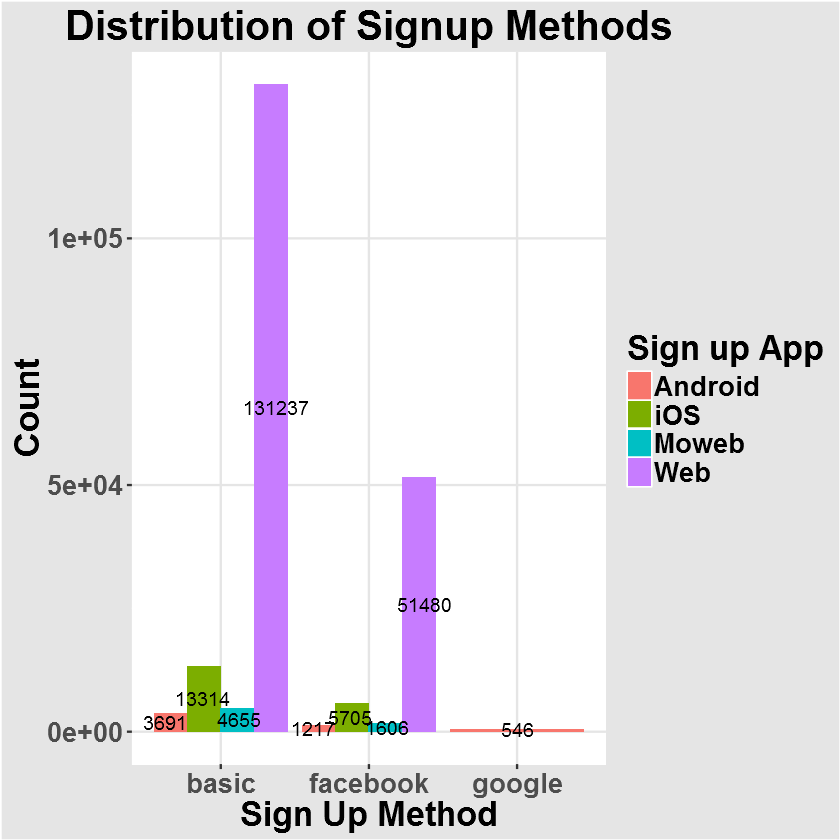

In [121]:
plot1.0

### Add error bars 
* Calculate the lower/upper bound first (the same thing as the distribution of the mean)

In [45]:
data_agg_signupApp_errorBar = data %>% group_by(signup_app) %>% 
                                       summarise(age_mean = mean(age, na.rm = TRUE),
                                                 age_se = sd(age, na.rm = TRUE)/sqrt(n()) ) %>%
                                       mutate(lowerBound = age_mean - age_se, upperBound = age_mean + age_se)
                                          
                                        

In [46]:
data_agg_signupApp_errorBar

signup_app age_mean    age_se lowerBound upperBound
1    Android 41.64693 1.6198954   40.02704   43.26683
2        iOS 36.70727 0.5777130   36.12956   37.28498
3      Moweb 51.78870 2.3048007   49.48390   54.09350
4        Web 50.94972 0.3759657   50.57375   51.32569

In [49]:
plot1.0 = ggplot(data_agg_signupApp_errorBar, aes(x=signup_app, y=age_mean,, fill = signup_app)) + 
  geom_bar(position=position_dodge(), stat="identity") +
  geom_errorbar(aes(ymin=lowerBound, ymax=upperBound),
                width=.2,                    # Width of the error bars
                position=position_dodge(.9))

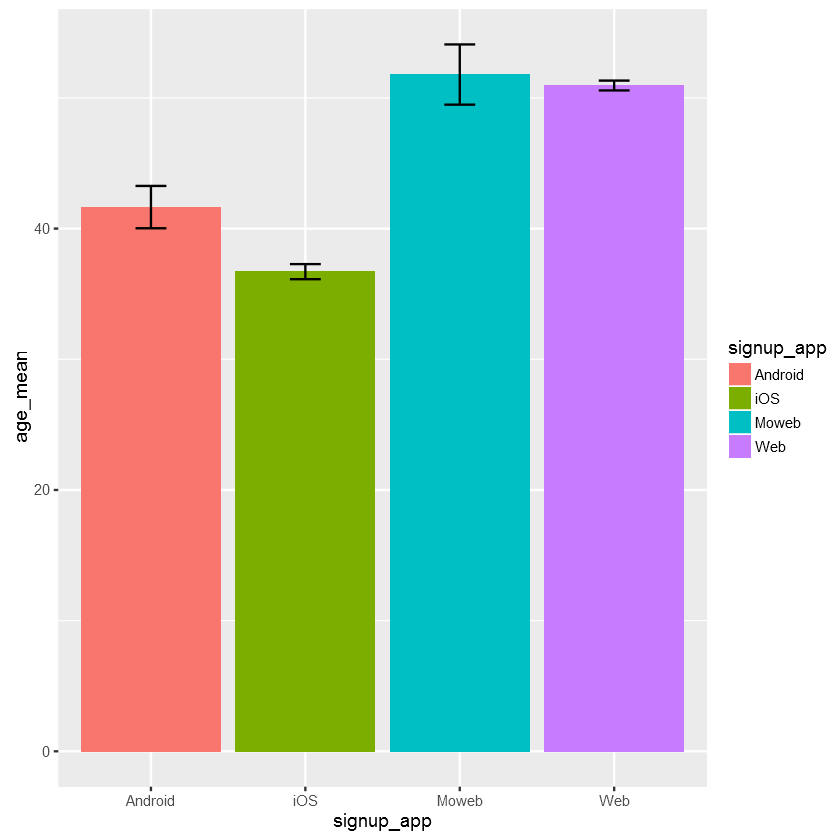

In [50]:
plot1.0

### Bar chart for displaying the mean

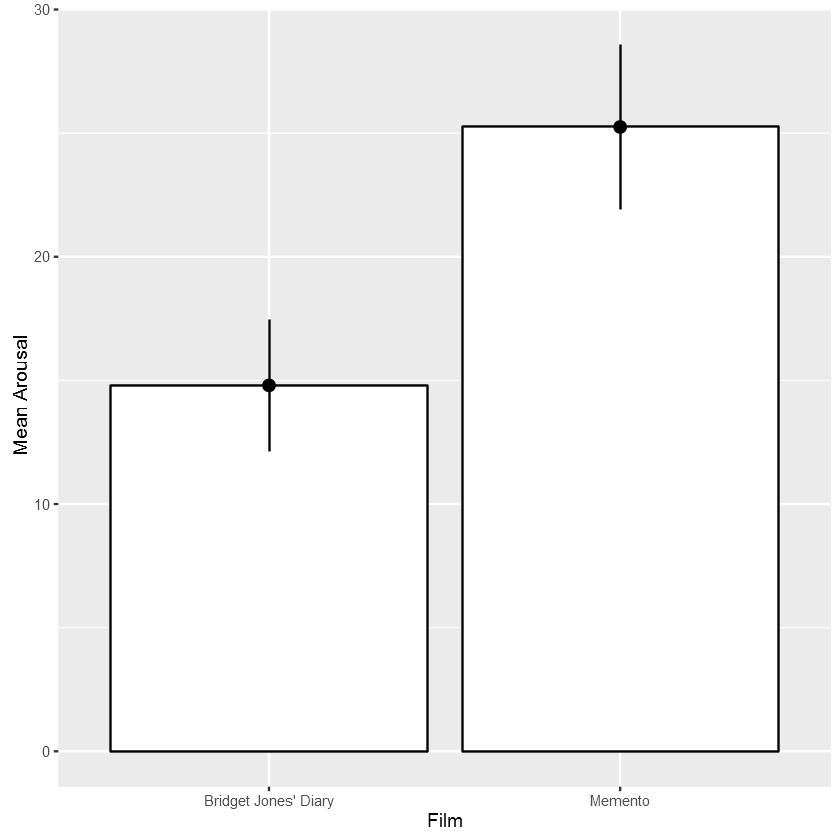

In [221]:
chickFlick = read.delim("E:/Personal/InterviewQuestion/Rscripts/LearningStatistics/ChickFlick.dat",  header = TRUE)

bar <- ggplot(chickFlick, aes(film, arousal))
bar + stat_summary(fun.y = mean, geom = "bar", fill = "White", colour = "Black")  +  #add a mean first
stat_summary(fun.data = mean_cl_normal, geom = "pointrange") + labs(x = "Film", y = "Mean Arousal")  # add a confidence interval afterwards

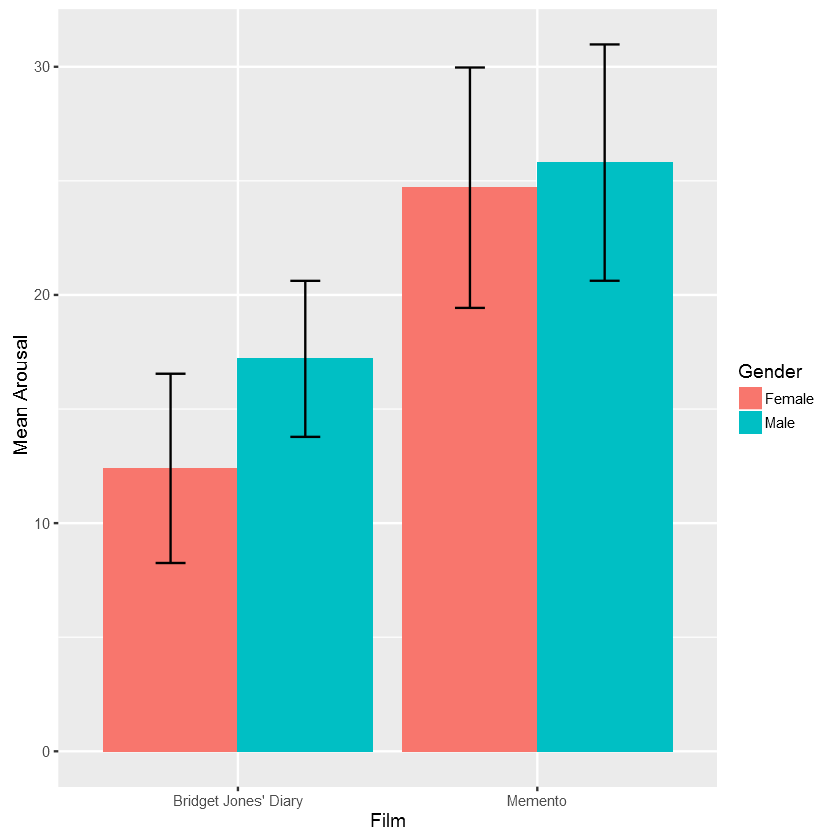

In [225]:
colours = c(Female = "Red", Male = "Green")
bar <- ggplot(chickFlick)
bar + stat_summary(aes(film, arousal, fill = gender ), fun.y = mean, geom = "bar", position="dodge") + 
stat_summary(aes(film, arousal, fill = gender ), fun.data = mean_cl_normal, geom = "errorbar",  position=position_dodge(width=0.90),
           width = 0.2) +  #by default these bars will be as wide as the bars displaying the mean, 20% of the width 
labs(x = "Film", y = "Mean Arousal", fill = "Gender")

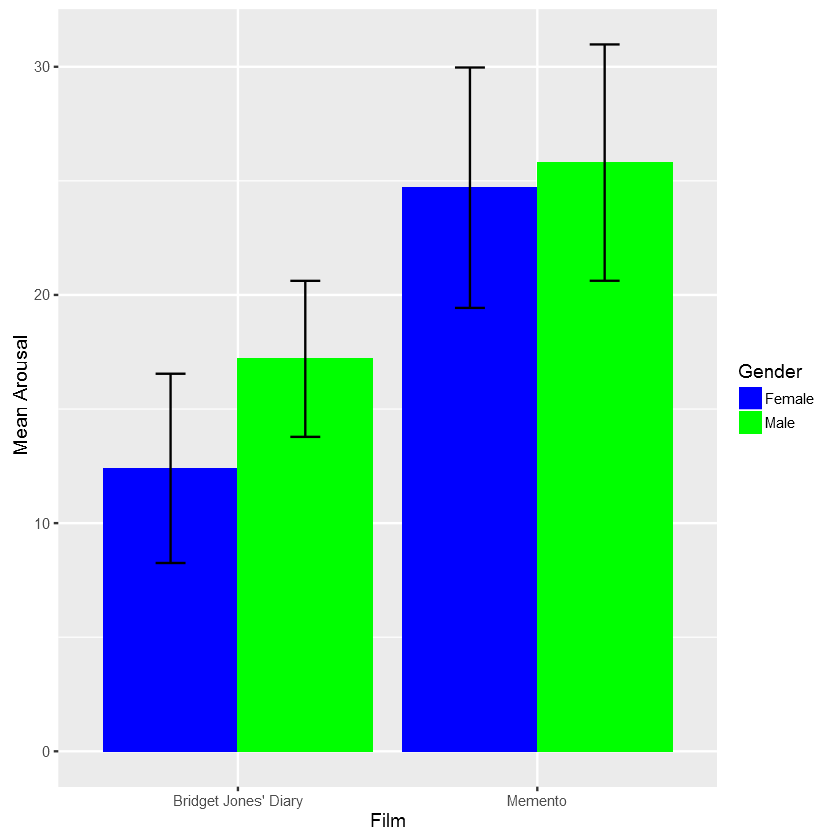

In [229]:
bar <- ggplot(chickFlick, aes(film, arousal, fill = gender))
bar + stat_summary(fun.y = mean, geom = "bar", position="dodge") + stat_summary(fun.data = mean_cl_normal, geom = "errorbar", position=position_dodge(width=0.90), width = 0.2) + 
labs(x = "Film", y = "Mean Arousal", fill = "Gender")+  scale_fill_manual("Gender", values = c("Female" = "Blue", "Male" = "Green"))

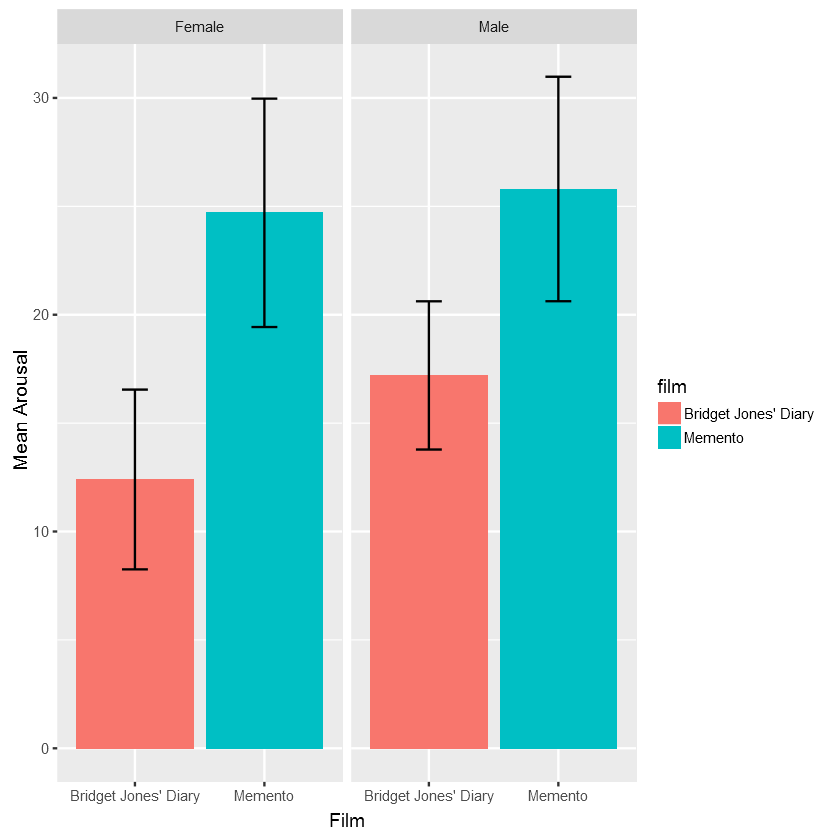

In [231]:
bar <- ggplot(chickFlick, aes(film, arousal, fill = film))
bar + stat_summary(fun.y = mean, geom = "bar") + stat_summary(fun.data = mean_cl_normal, geom = "errorbar", width = 0.2) + 
facet_wrap(~gender) + labs(x = "Film", y = "Mean Arousal") 

## Heatmap

In [53]:
library(viridis)

In [55]:
data_agg_country_destination_affliatedchannel = data %>% group_by(country_destination,
                                                                  affiliate_channel) %>% summarise(count = n())

Warning message:
In grid.Call.graphics(L_raster, x$raster, x$x, x$y, x$width, x$height, : raster rendering is not implemented for this device

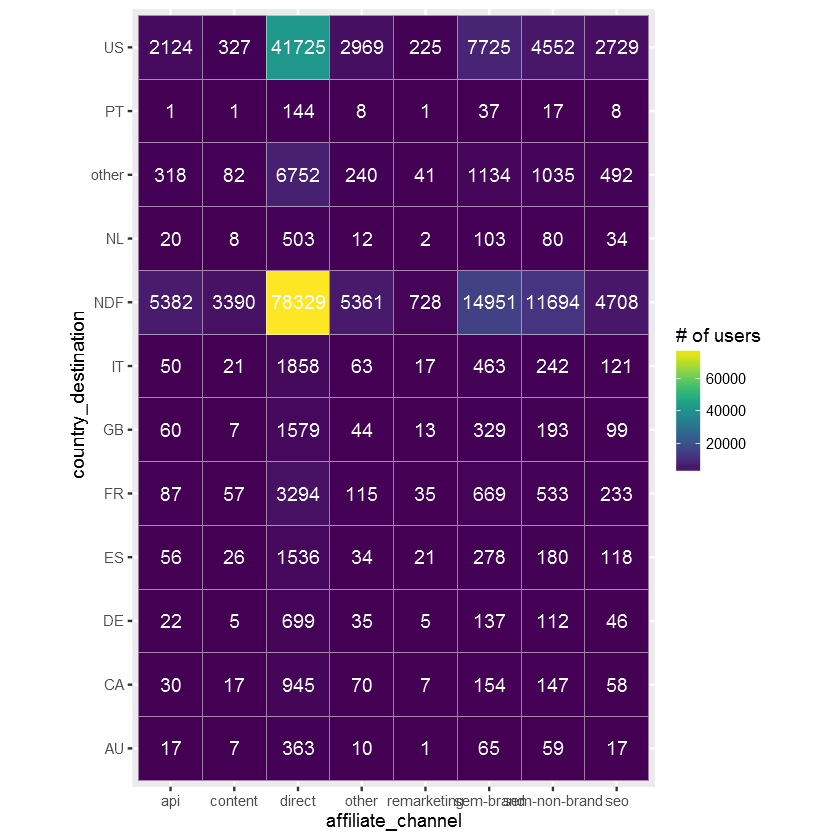

In [79]:
library(scales)
ggplot(data_agg_country_destination_affliatedchannel, aes(x = affiliate_channel, y = country_destination, fill = count, label = count )) + 
geom_tile(color="white", size=0.1) +
scale_fill_viridis(name="# of users")+ coord_equal() + geom_text(color = "white")

## Histogram

In [122]:
head(data)

id date_account_created timestamp_first_active date_first_booking
1 gxn3p5htnn           2010-06-28           2.009032e+13                   
2 820tgsjxq7           2011-05-25           2.009052e+13                   
3 4ft3gnwmtx           2010-09-28           2.009061e+13         2010-08-02
4 bjjt8pjhuk           2011-12-05           2.009103e+13         2012-09-08
5 87mebub9p4           2010-09-14           2.009121e+13         2010-02-18
6 osr2jwljor           2010-01-01           2.010010e+13         2010-01-02
     gender age signup_method signup_flow language affiliate_channel
1 -unknown-  NA      facebook           0       en            direct
2      MALE  38      facebook           0       en               seo
3    FEMALE  56         basic           3       en            direct
4    FEMALE  42      facebook           0       en            direct
5 -unknown-  41         basic           0       en            direct
6 -unknown-  NA         basic           0       en             other
  affiliate_provider first_affiliate_tracked signup_app first_device_type
1             direct               untracked        Web       Mac Desktop
2             google               untracked        Web       Mac Desktop
3             direct               untracked        Web   Windows Desktop
4             direct               untracked        Web       Mac Desktop
5             direct               untracked        Web       Mac Desktop
6              other                     omg        Web       Mac Desktop
  first_browser country_destination
1        Chrome                 NDF
2        Chrome                 NDF
3            IE                  US
4       Firefox               other
5        Chrome                  US
6        Chrome                  US

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 87990 rows containing non-finite values (stat_bin).

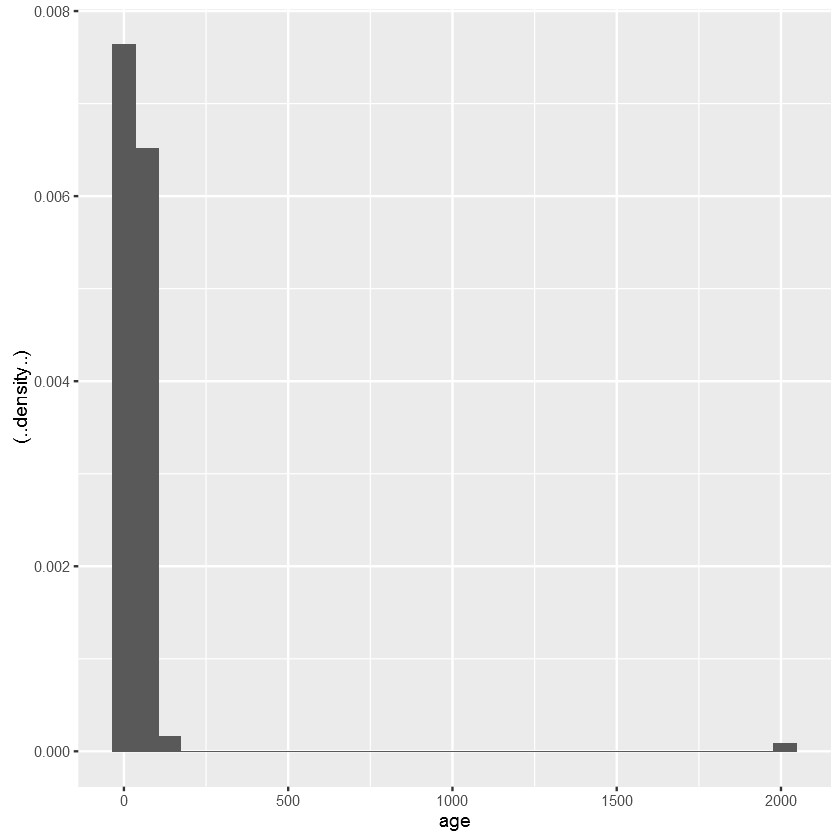

In [128]:
ggplot(data, aes(x = age)) + geom_histogram(aes(y = (..density..))) 

### Add normal curve to the histogram

In [ ]:
hist.day1 <- ggplot(dlf, aes(day1)) +theme(legend.position = "none") +
geom_histogram(aes(y = ..density..), colour = "black", fill = "white") +
labs(x = "Hygiene score on day 1", y = "Density") +stat_function(fun = dnorm, args = list(mean = mean(dlf$day1, na.rm
= TRUE), sd = sd(dlf$day1, na.rm = TRUE)), colour = "black", size = 1)
hist.day1

## Hexbin Plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


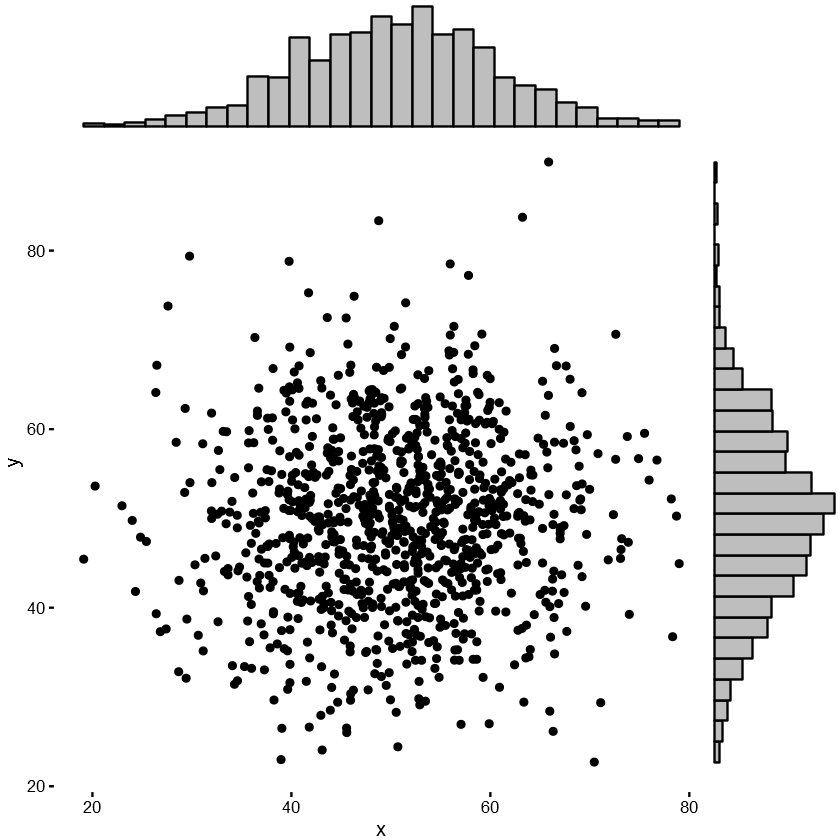

In [129]:
library(ggplot2)
# create dataset with 1000 normally distributed points
df <- data.frame(x = rnorm(1000, 50, 10), y = rnorm(1000, 50, 10))
# create a ggplot2 scatterplot
p <- ggplot(df, aes(x, y)) + geom_point() + theme_classic()
# add marginal histograms
ggExtra::ggMarginal(p, type = "histogram")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In grid.Call.graphics(L_raster, x$raster, x$x, x$y, x$width, x$height, : raster rendering is not implemented for this device

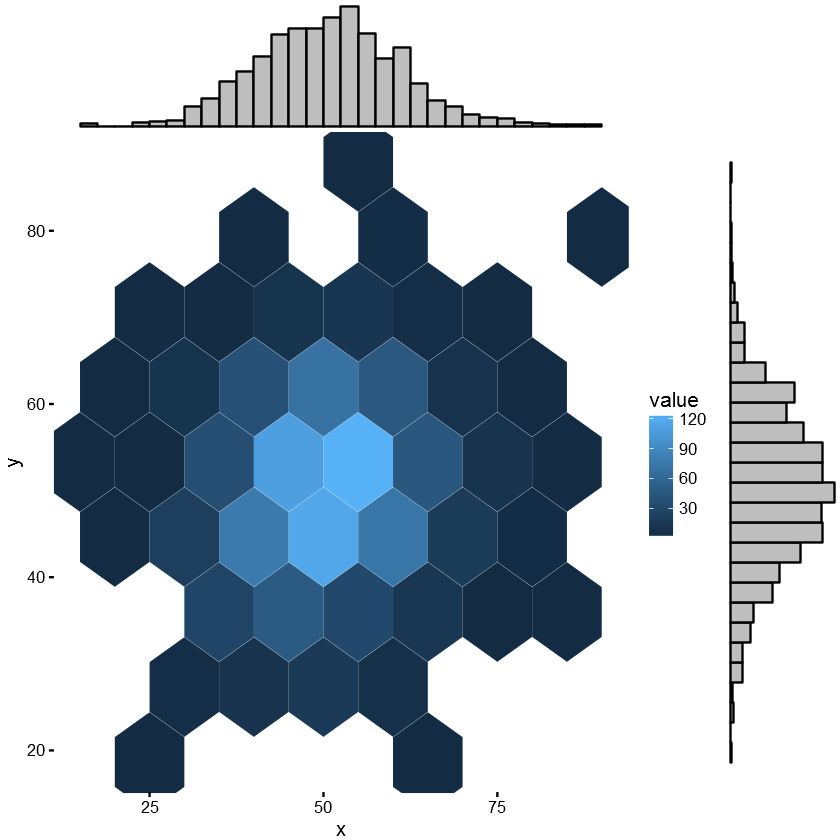

In [140]:
df <- data.frame(x = rnorm(1000, 50, 10), y = rnorm(1000, 50, 10))
# create a ggplot2 scatterplot
p <- ggplot(df, aes(x, y)) + stat_binhex(bins = 25, binwidth = c(10, 10)) + theme_classic() #binwidth is for both vertical and horizontal direction
# add marginal histograms
ggExtra::ggMarginal(p, type = "histogram")

## Scatter Plot

In [214]:
examData <- read.delim("E:/Personal/InterviewQuestion/Rscripts/LearningStatistics/Exam Anxiety.dat",  header = TRUE)
names(examData)

[1] "Code"    "Revise"  "Exam"    "Anxiety" "Gender"

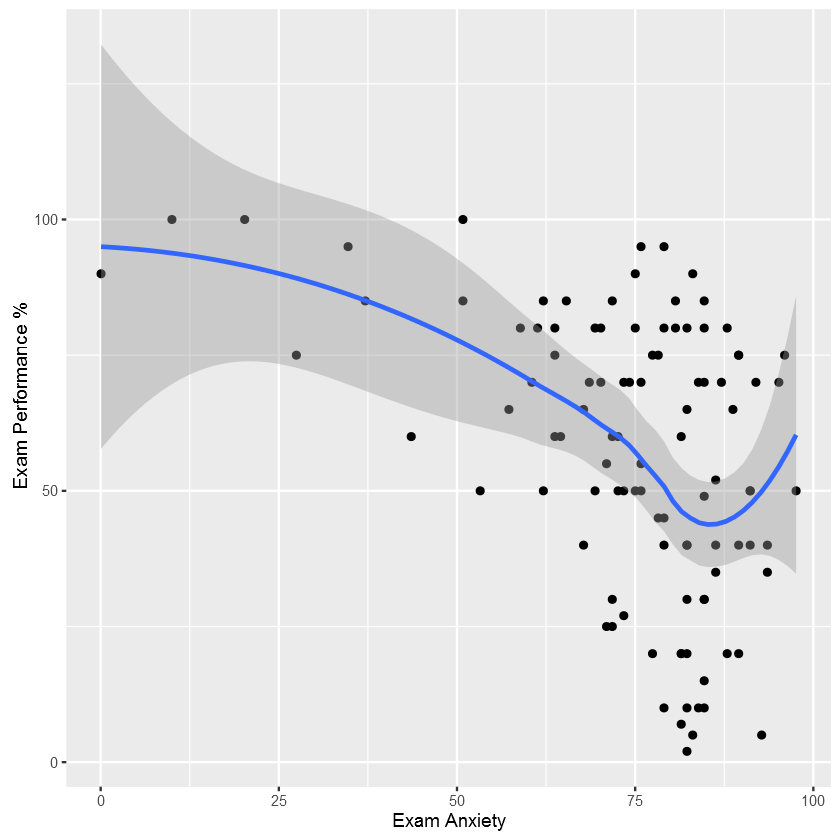

In [216]:
#Simple scatter with smooth
scatter <- ggplot(examData, aes(Anxiety, Exam))
scatter + geom_point() + geom_smooth() + labs(x = "Exam Anxiety", y = "Exam Performance %") 

ERROR: Error in eval(expr, envir, enclos): could not find function "saveInImageDirectory"


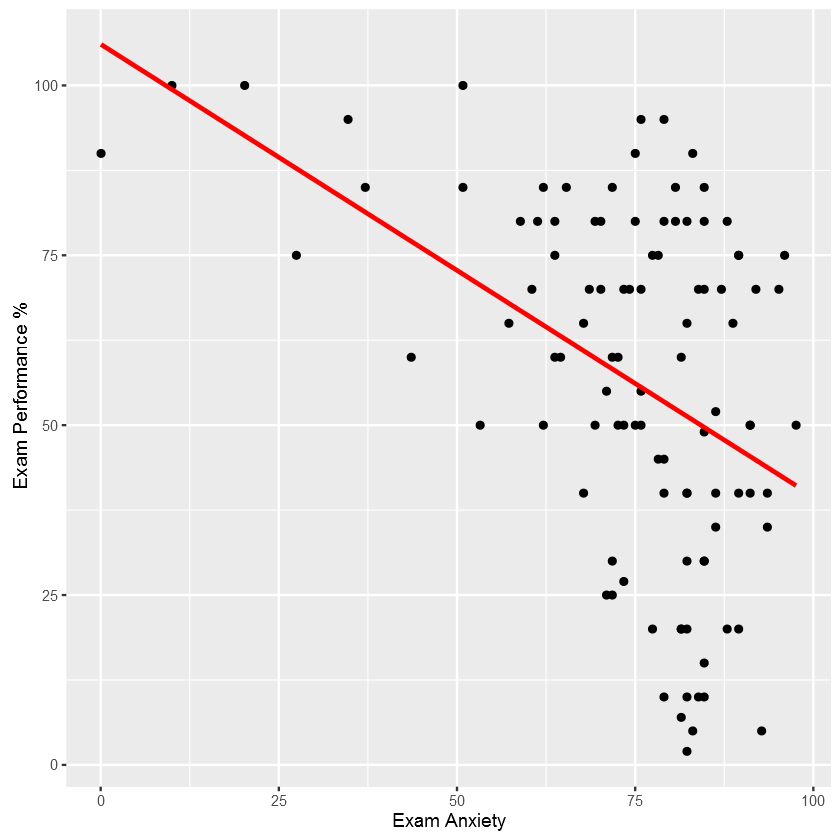

In [217]:
#Simple scatter with regression line
scatter <- ggplot(examData, aes(Anxiety, Exam))
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red", se = F) + labs(x = "Exam Anxiety", y = "Exam Performance %") 

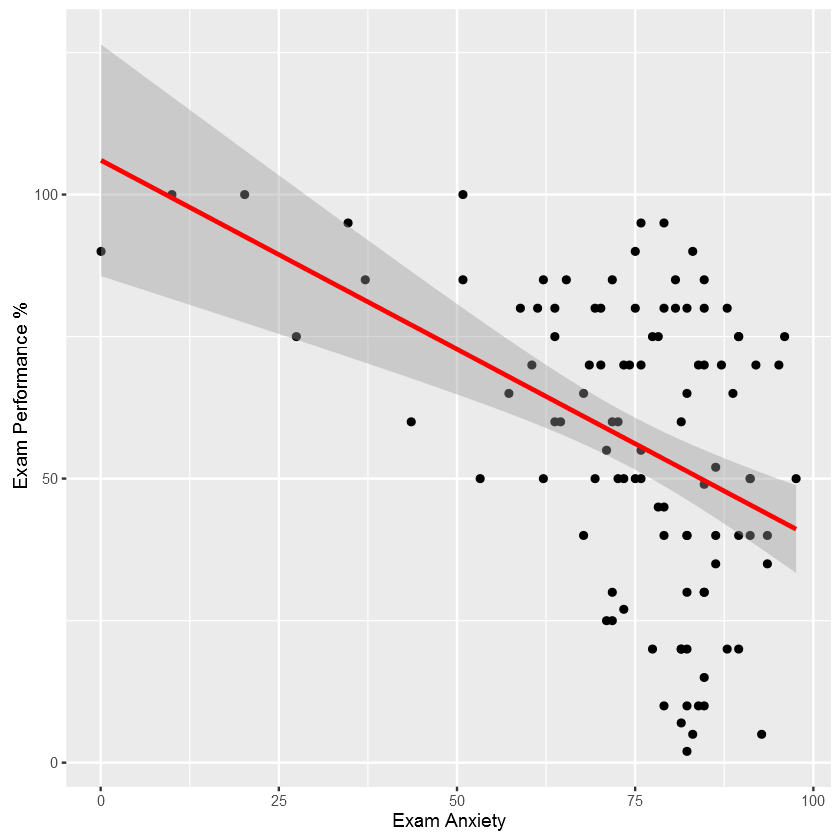

In [218]:
#Simple scatter with regression line + CI

scatter <- ggplot(examData, aes(Anxiety, Exam))
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red")+ labs(x = "Exam Anxiety", y = "Exam Performance %") 

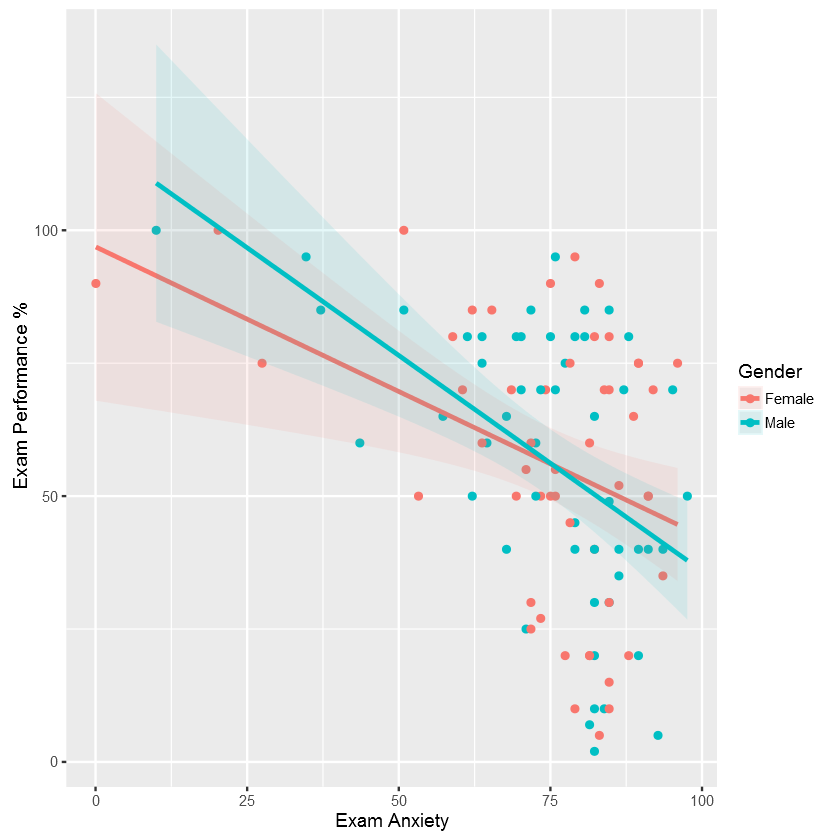

In [220]:
#Grouped scatter with regression line + CI

scatter <- ggplot(examData, aes(Anxiety, Exam, colour = Gender))
scatter + geom_point() + geom_smooth(method = "lm", aes(fill = Gender), alpha = 0.1) + labs(x = "Exam Anxiety", y = "Exam Performance %", colour = "Gender") 

## Line Plot

In [232]:
hiccupsData <- read.delim("E:/Personal/InterviewQuestion/Rscripts/LearningStatistics/Hiccups.dat",  header = TRUE)
hiccups<-stack(hiccupsData)
names(hiccups)<-c("Hiccups","Intervention")
hiccups$Intervention_Factor<-factor(hiccups$Intervention, levels(hiccups$Intervention)[c(1, 4, 2, 3)])

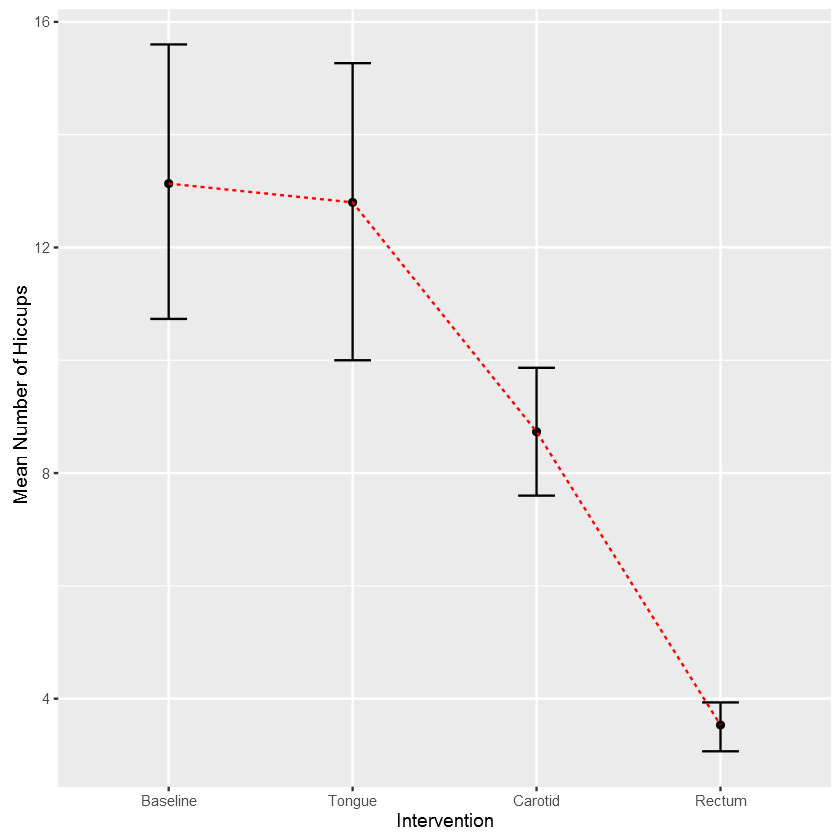

In [233]:
line <- ggplot(hiccups,  aes(Intervention_Factor, Hiccups))
line + stat_summary(fun.y = mean, geom = "point") + stat_summary(fun.data = mean_cl_boot, geom = "errorbar", width = 0.2) + 
labs(x = "Intervention", y = "Mean Number of Hiccups") + stat_summary(fun.y = mean, geom = "line", aes(group=1),colour = "Red", linetype = "dashed")

In [234]:
textData <- read.delim("E:/Personal/InterviewQuestion/Rscripts/LearningStatistics/TextMessages.dat",  header = TRUE)
textData$id = row(textData[1])
library(reshape2)

In [237]:
textMessages<-melt(textData, id.var = c("id", "Group"))
names(textMessages)<-c("id", "Group", "Time", "Grammar_Score")
textMessages$Time<-factor(textMessages$Time, labels = c("Baseline", "6 Months"))

In [236]:
head(textMessages)

id          Group variable value
1  1 Text Messagers Baseline    52
2  2 Text Messagers Baseline    68
3  3 Text Messagers Baseline    85
4  4 Text Messagers Baseline    47
5  5 Text Messagers Baseline    73
6  6 Text Messagers Baseline    57

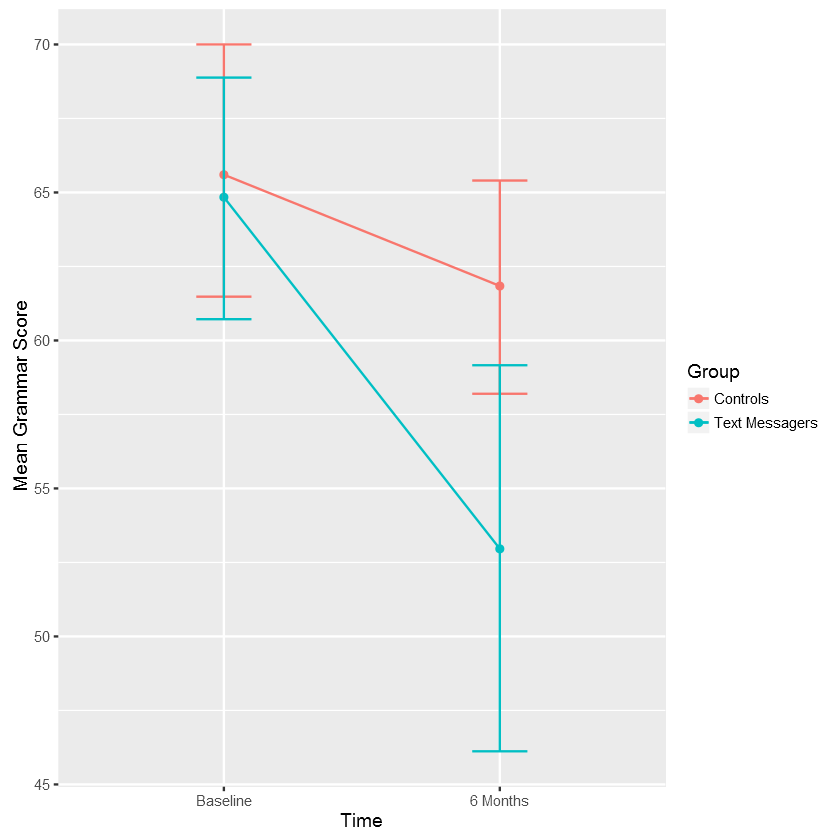

In [238]:
line <- ggplot(textMessages, aes(Time, Grammar_Score, colour = Group))
line + stat_summary(fun.y = mean, geom = "point") + 
stat_summary(fun.y = mean, geom = "line", aes(group= Group)) + 
stat_summary(fun.data = mean_cl_boot, geom = "errorbar", width = 0.2) + 
labs(x = "Time", y = "Mean Grammar Score", colour = "Group") 



## Correlation Plot

In [141]:
nba = read.csv("http://datasets.flowingdata.com/ppg2008.csv")

In [144]:
library(GGally)


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [142]:
head(nba)

Name  G  MIN  PTS  FGM  FGA   FGP FTM FTA   FTP ... X3PA  X3PP ORB
1   Dwyane Wade  79 38.6 30.2 10.8 22.0 0.491 7.5 9.8 0.765 ...  3.5 0.317 1.1
2  LeBron James  81 37.7 28.4  9.7 19.9 0.489 7.3 9.4 0.780 ...  4.7 0.344 1.3
3   Kobe Bryant  82 36.2 26.8  9.8 20.9 0.467 5.9 6.9 0.856 ...  4.1 0.351 1.1
4 Dirk Nowitzki  81 37.7 25.9  9.6 20.0 0.479 6.0 6.7 0.890 ...  2.1 0.359 1.1
5 Danny Granger  67 36.2 25.8  8.5 19.1 0.447 6.0 6.9 0.878 ...  6.7 0.404 0.7
6  Kevin Durant  74 39.0 25.3  8.9 18.8 0.476 6.1 7.1 0.863 ...  3.1 0.422 1.0
  DRB TRB AST STL BLK  TO  PF
1 3.9 5.0 7.5 2.2 1.3 3.4 2.3
2 6.3 7.6 7.2 1.7 1.1 3.0 1.7
3 4.1 5.2 4.9 1.5 0.5 2.6 2.3
4 7.3 8.4 2.4 0.8 0.8 1.9 2.2
5 4.4 5.1 2.7 1.0 1.4 2.5 3.1
6 5.5 6.5 2.8 1.3 0.7 3.0 1.8

Warning message:
In grid.Call.graphics(L_raster, x$raster, x$x, x$y, x$width, x$height, : raster rendering is not implemented for this device

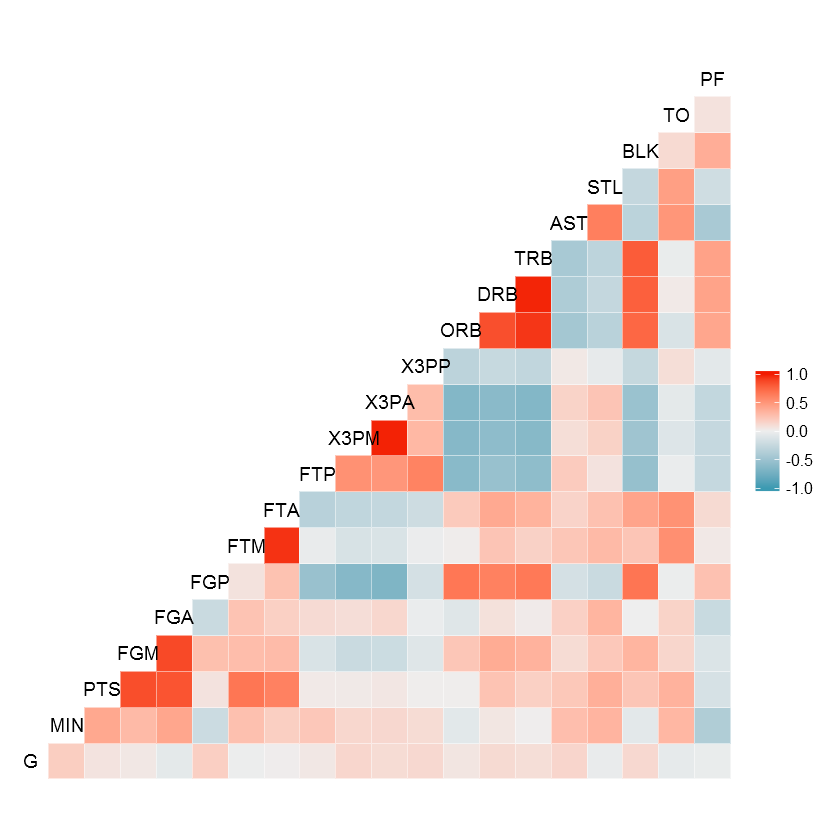

In [145]:
ggcorr(data = NULL, cor_matrix = cor(nba[, -1], use = "everything"))

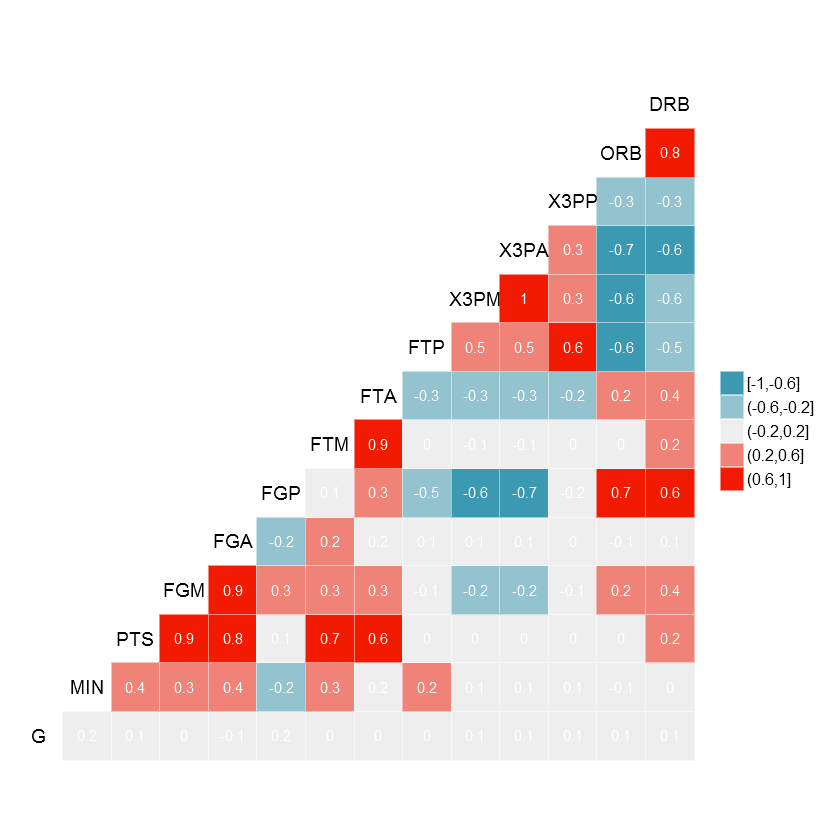

In [147]:
ggcorr(nba[, 2:15], nbreaks = 5,  label = TRUE, label_size = 3, label_color = "white")

## Pairs Plot

<em>https://cran.r-project.org/web/packages/GGally/vignettes/ggpairs.html</em>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


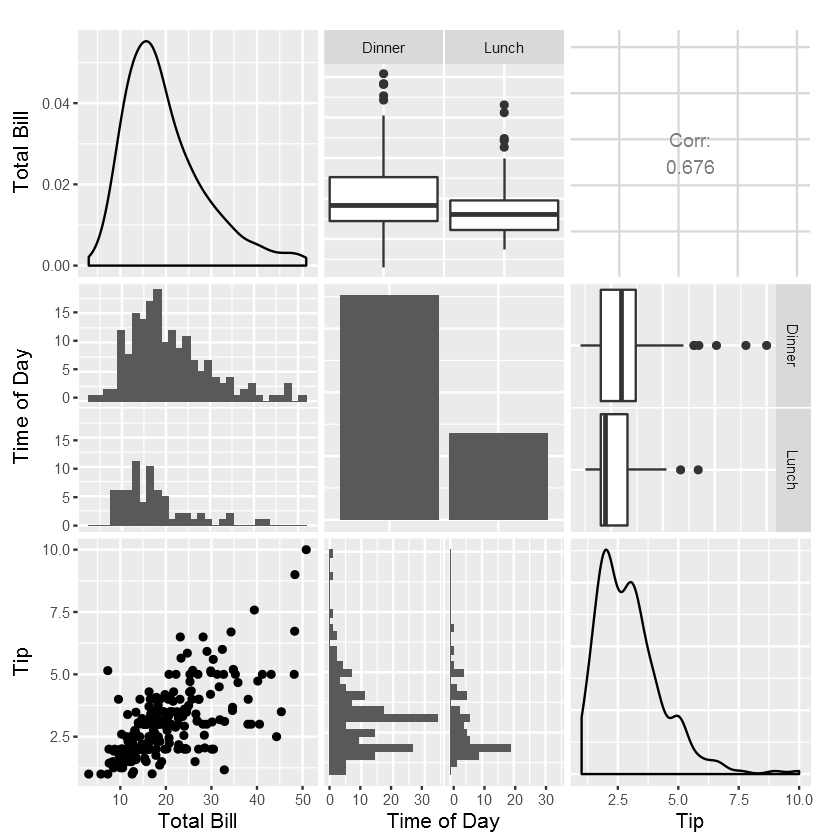

In [150]:
pm <- ggpairs(tips, columns = c(1, 6, 2))
pm <- ggpairs(tips, columns = c("total_bill", "time", "tip"), columnLabels = c("Total Bill", "Time of Day", "Tip"))
pm

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


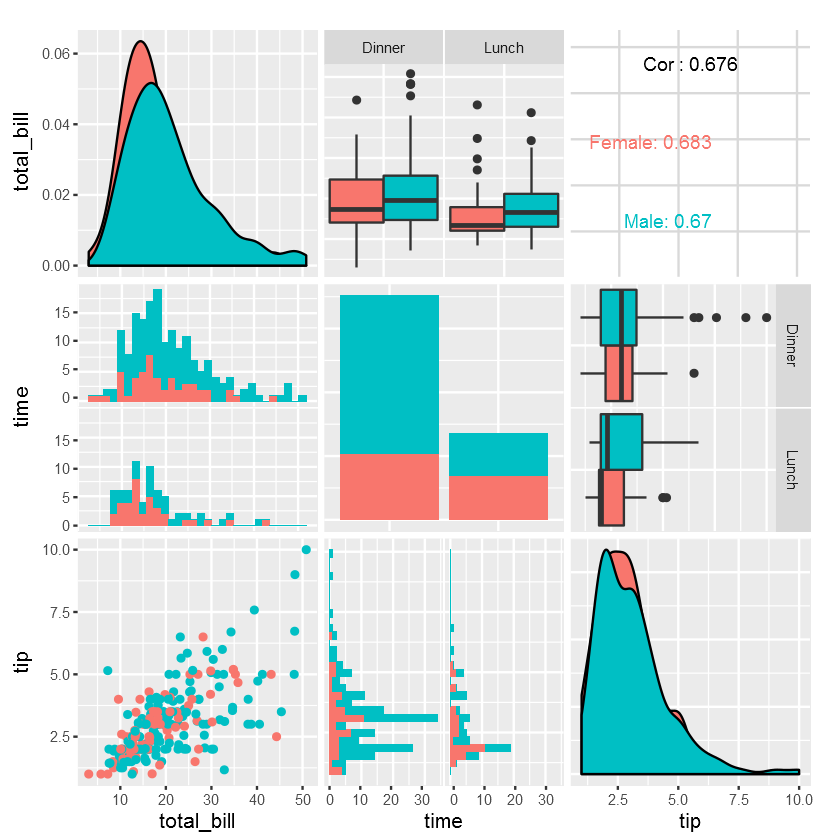

In [151]:
pm <- ggpairs(tips, mapping = aes(color = sex), columns = c("total_bill", "time", "tip"))
pm #only default can have this automatic change in the aesthetics mapping

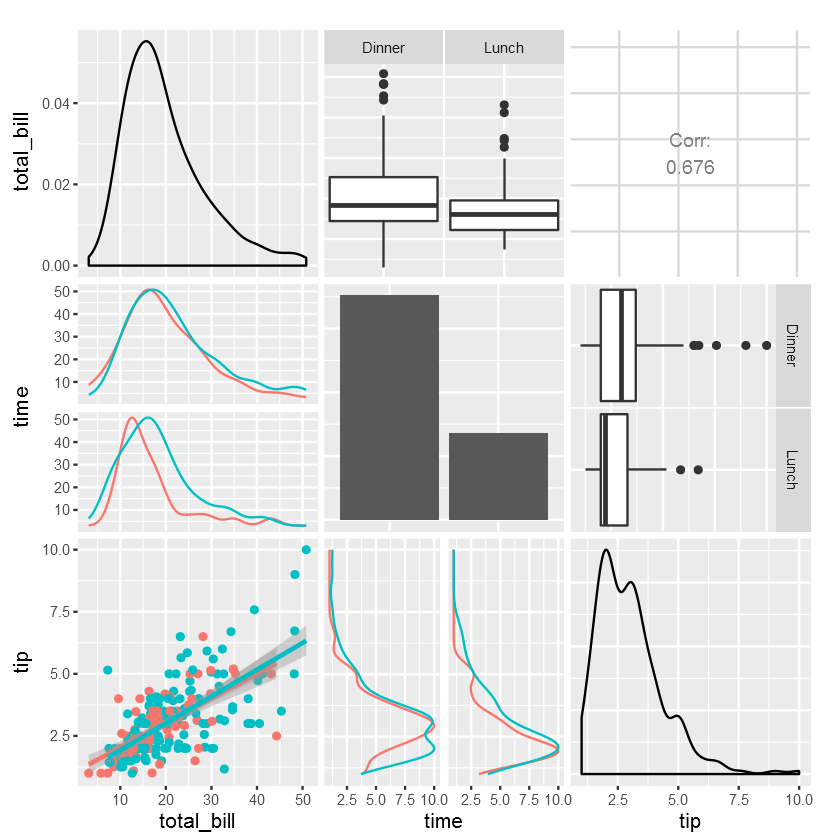

In [155]:
pm <- ggpairs(
  tips, columns = c("total_bill", "time", "tip"),
  lower = list(
    continuous = "smooth",
    combo = "facetdensity",
    mapping = aes(color= sex)
  )
)
pm #when you change the defalut then the mapping will only apply to the ones which has the mapping

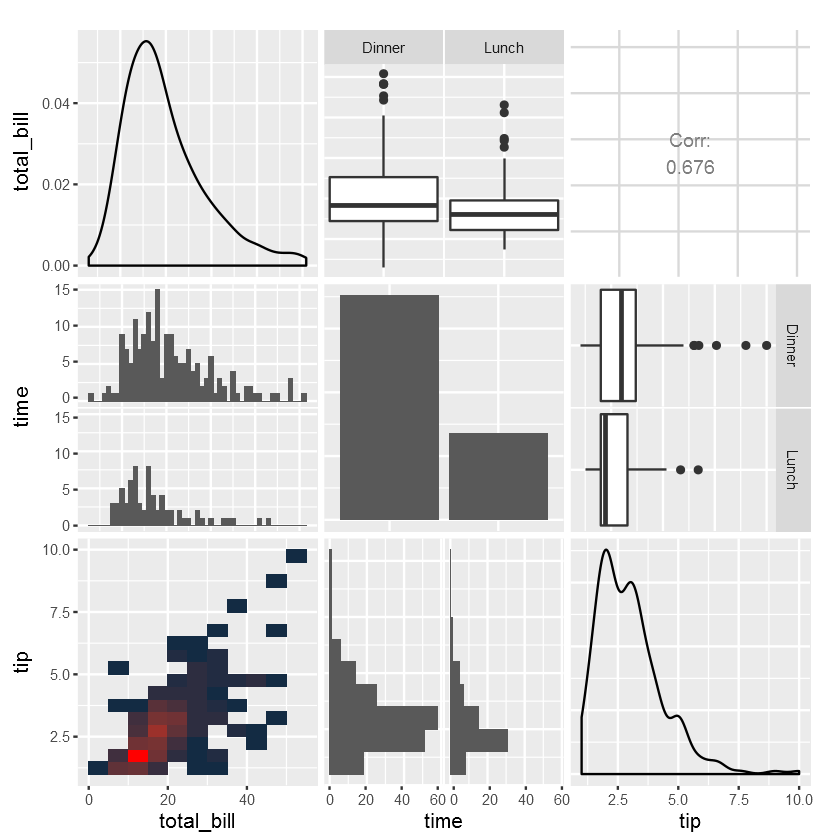

In [157]:
my_bin <- function(data, mapping, ..., low = "#132B43", high = "#56B1F7") {
  ggplot(data = data, mapping = mapping) +
    geom_bin2d(...) +
    scale_fill_gradient(low = low, high = high)
} #use customized function as long as it is a ggplot2 object
pm <- ggpairs(
  tips, columns = c("total_bill", "time", "tip"),
  lower = list(
    combo = wrap("facethist", binwidth = 1),
    continuous = wrap(my_bin, binwidth = c(5, 0.5), high = "red")
  )
)
pm

## Cumulative Density Plot

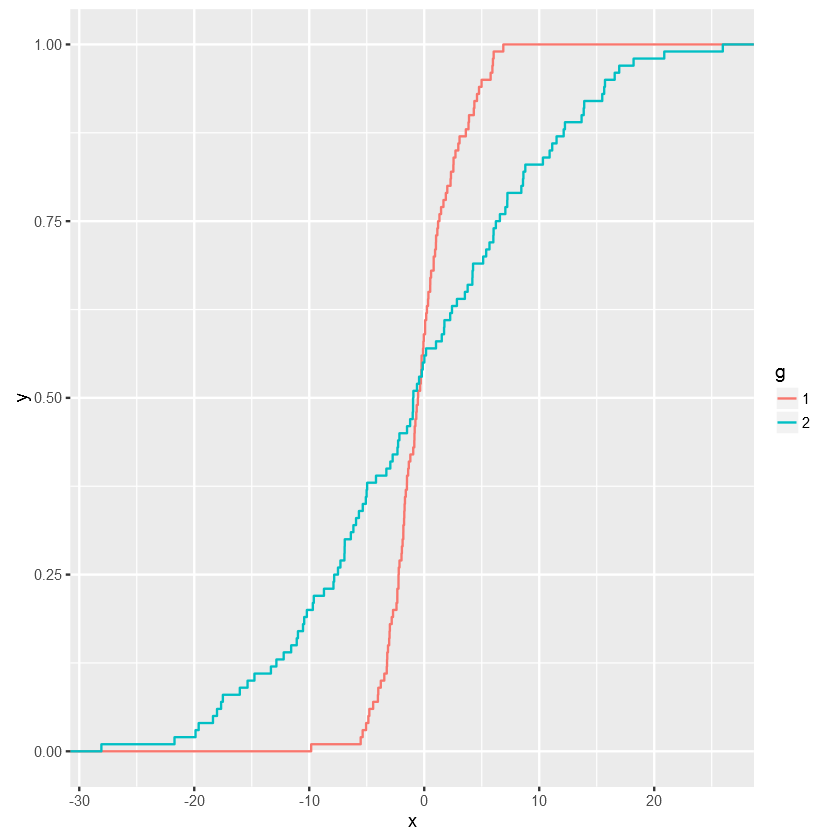

In [158]:
df <- data.frame(x = c(rnorm(100, 0, 3), rnorm(100, 0, 10)),
                 g = gl(2, 100))

ggplot(df, aes(x, colour = g)) + stat_ecdf()

## Q-Q Plot

In [203]:
require(ggplot2)
diagPlot<-function(model){
    p1<-ggplot(model, aes(.fitted, .resid))+geom_point()
    p1<-p1+geom_smooth(method="loess")+geom_hline(yintercept=0, col="red", linetype="dashed")
    p1<-p1+xlab("Fitted values")+ylab("Residuals")
    p1<-p1+ggtitle("Residual vs Fitted Plot")+theme_bw()
    
    p2<-ggplot(model, aes(qqnorm(.stdresid)[[1]], .stdresid))+geom_point(na.rm = TRUE)
    p2<-p2+geom_abline(aes(qqline(.stdresid)))+xlab("Theoretical Quantiles")+ylab("Standardized Residuals")
    p2<-p2+ggtitle("Normal Q-Q")+theme_bw()
    
    p3<-ggplot(model, aes(.fitted, sqrt(abs(.stdresid))))+geom_point(na.rm=TRUE)
    p3<-p3+geom_smooth(method="loess", na.rm = TRUE)+xlab("Fitted Value")
    p3<-p3+ylab(expression(sqrt("|Standardized residuals|")))
    p3<-p3+ggtitle("Scale-Location")+theme_bw()
    
    p4<-ggplot(model, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
    p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
    p4<-p4+ggtitle("Cook's distance")+theme_bw()
    
    p5<-ggplot(model, aes(.hat, .stdresid))+geom_point(aes(size=.cooksd), na.rm=TRUE)
    p5<-p5+geom_smooth(method="loess", na.rm=TRUE)
    p5<-p5+xlab("Leverage")+ylab("Standardized Residuals")
    p5<-p5+ggtitle("Residual vs Leverage Plot")
    p5<-p5+scale_size_continuous("Cook's Distance", range=c(1,5))
    p5<-p5+theme_bw()+theme(legend.position="bottom")
    
    p6<-ggplot(model, aes(.hat, .cooksd))+geom_point(na.rm=TRUE)+geom_smooth(method="loess", na.rm=TRUE)
    p6<-p6+xlab("Leverage hii")+ylab("Cook's Distance")
    p6<-p6+ggtitle("Cook's dist vs Leverage hii/(1-hii)")
    p6<-p6+geom_abline(slope=seq(0,3,0.5), color="gray", linetype="dashed")
    p6<-p6+theme_bw()
    
    return(list(rvfPlot=p1, qqPlot=p2, sclLocPlot=p3, cdPlot=p4, rvlevPlot=p5, cvlPlot=p6))
}

In [204]:
lm.model<-lm(mpg~cyl+disp+hp+drat+wt, data=mtcars)
diagPlts<-diagPlot(lm.model)

In [205]:
lbry<-c("grid", "gridExtra")
lapply(lbry, require, character.only=TRUE, warn.conflicts = FALSE, quietly = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

In [163]:
 p1<-ggplot(lm.model, aes(.fitted, .resid))+geom_point()

In [199]:
p3<-ggplot(lm.model, aes(.fitted, sqrt(abs(.stdresid))))+geom_point(na.rm=TRUE)

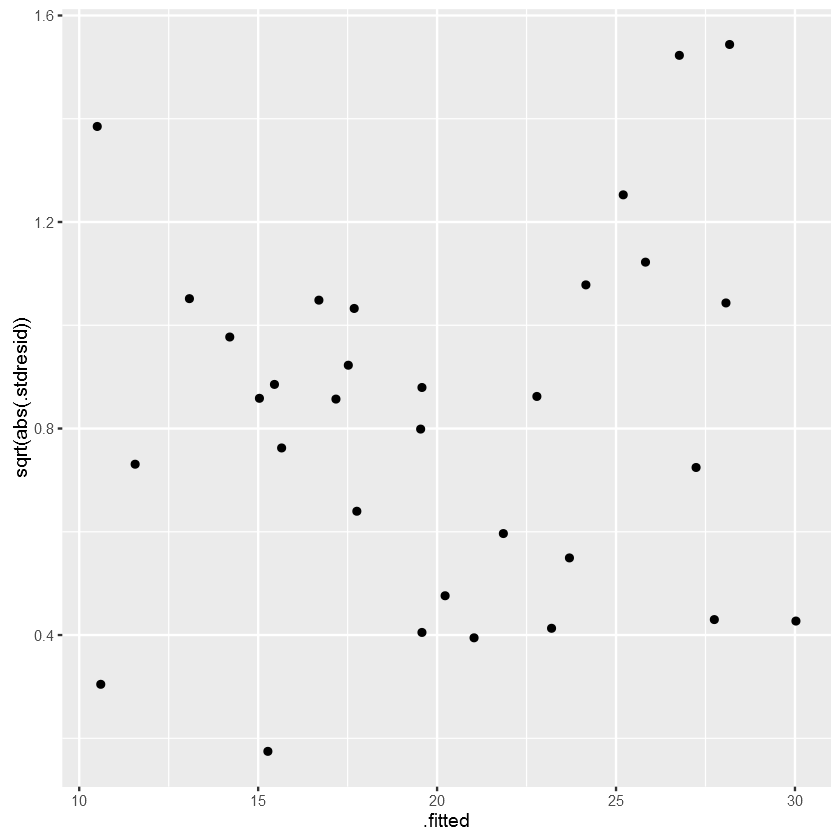

In [200]:
p3

In [201]:
p3<-p3+geom_smooth(method = "loess")+xlab("Fitted Value")

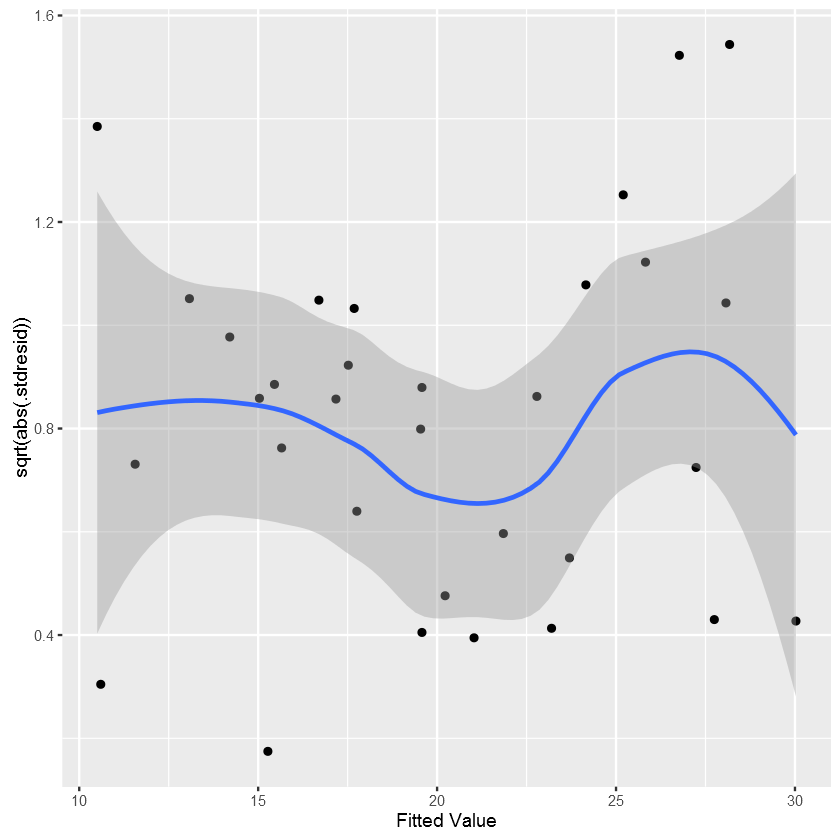

In [202]:
p3

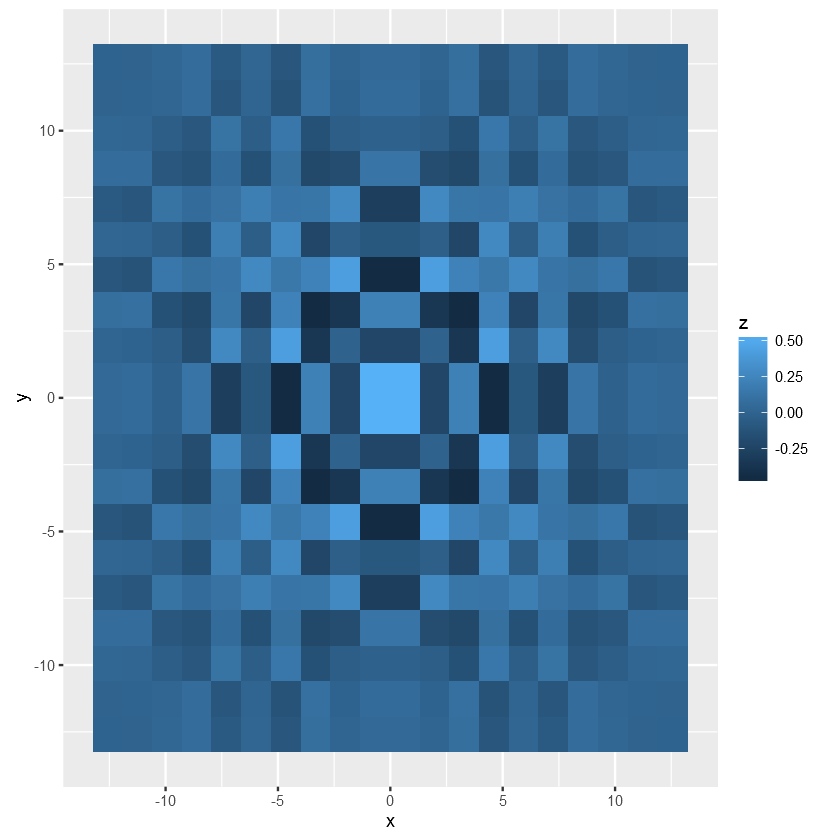

In [2]:
pp <- function (n,r=4) {
 x <- seq(-r*pi, r*pi, len=n)
 df <- expand.grid(x=x, y=x)
 df$r <- sqrt(df$x^2 + df$y^2)
 df$z <- cos(df$r^2)*exp(-df$r/6)
 df
}
p <- ggplot(pp(20), aes(x=x,y=y))

p + geom_tile(aes(fill = z))

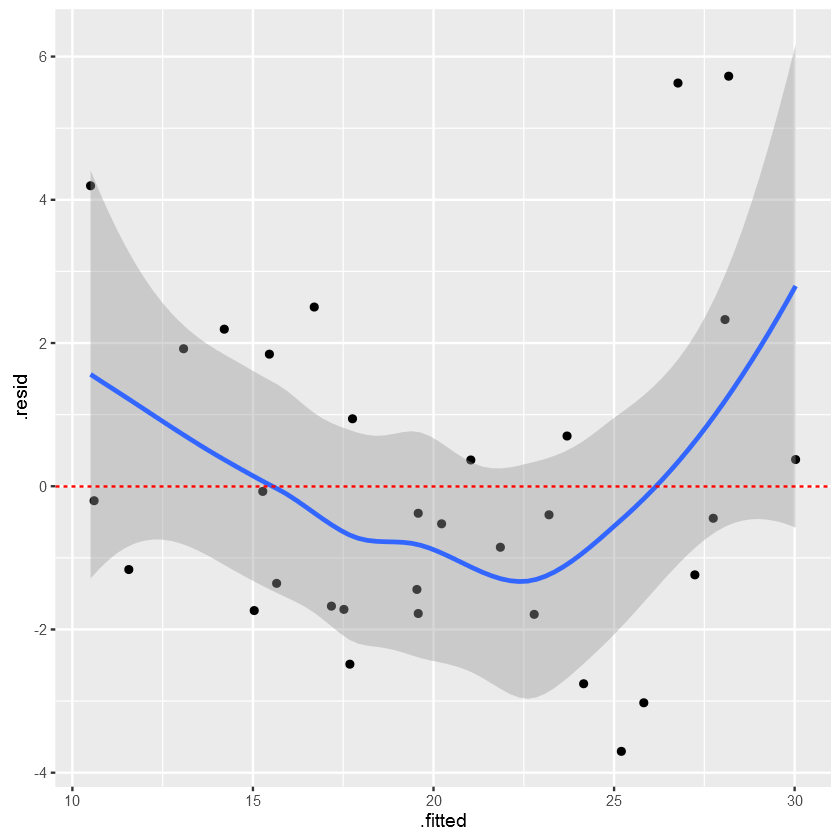

In [165]:
    p1<-p1+stat_smooth(method="loess")+geom_hline(yintercept=0, col="red", linetype="dashed")
p1

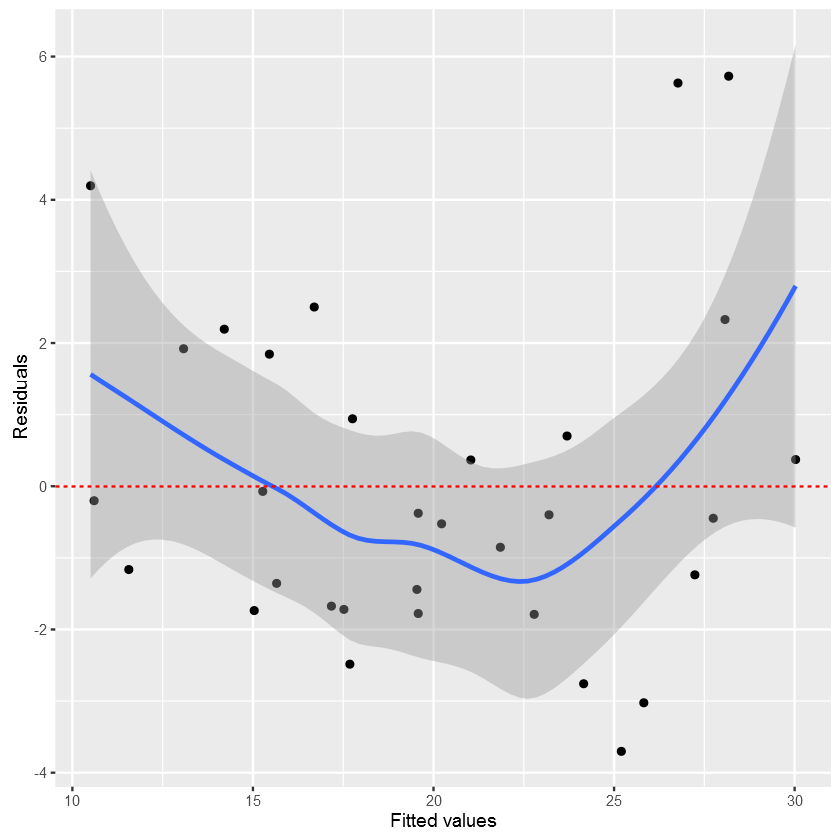

In [166]:
    p1<-p1+xlab("Fitted values")+ylab("Residuals")
p1

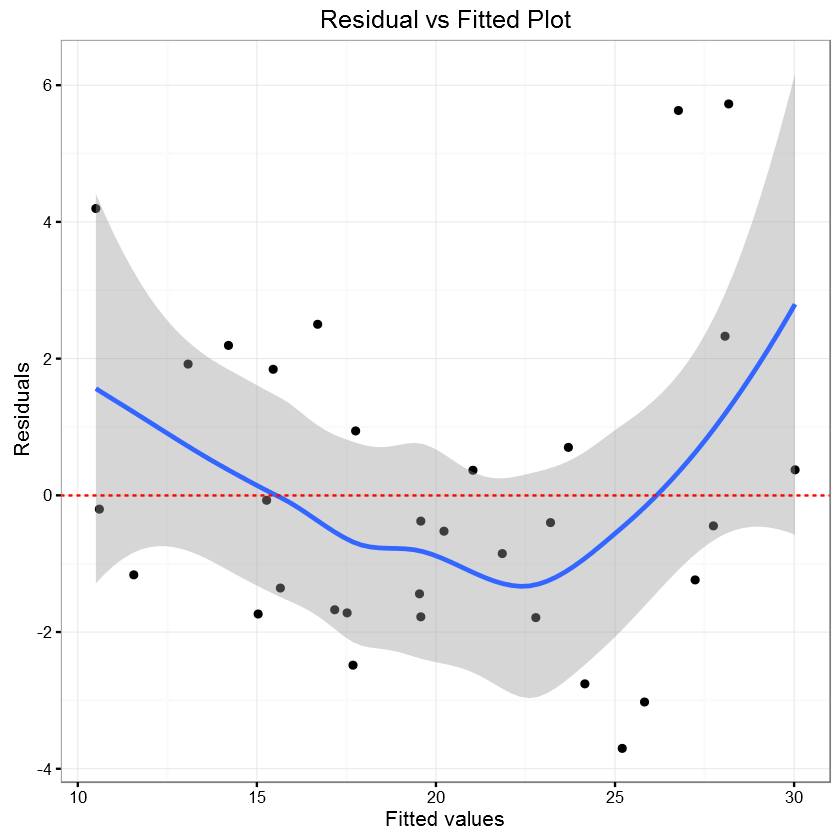

In [167]:
    p1<-p1+ggtitle("Residual vs Fitted Plot")+theme_bw()
p1